In [41]:
# snippet for importing local modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
	sys.path.append(module_path)

# Точечные и интервальные оценки экспоненциального распределения

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm, t, chi2
%matplotlib inline

from utils.summary_analysis import analysis, print_analysis


SIZE = 100
SCALE = 5
LOC = 0

B = 0.95


rng = np.random.default_rng(2741)
dist = LOC + rng.exponential(scale=SCALE, size=100)

## Частотная гистограмма

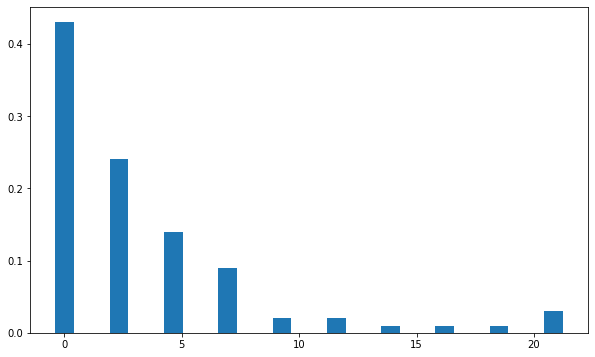

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

counts, bins = np.histogram(dist)
bins = bins[:-1]
counts = counts / len(dist)

ax.bar(bins, counts)
plt.show()

## Scatterplot - Диаграмма рассеивания

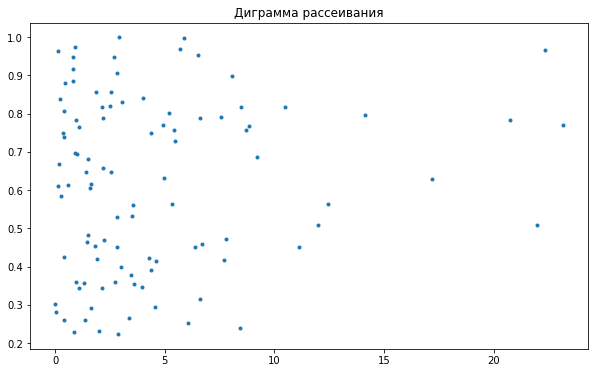

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.sort(dist)
y = np.random.uniform(0.2, 1, size=SIZE)

ax.plot(x, y, '.')

plt.title('Диграмма рассеивания')
plt.show()

## PDF - График функции плотности

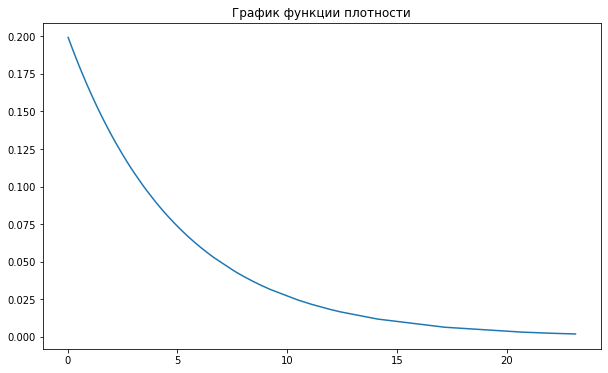

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

y = expon.pdf(x, scale=SCALE)

ax.plot(x, y)

plt.title('График функции плотности')
plt.show()

## Суммарный анализ

In [46]:
dist_analysis = analysis(dist)
print_analysis(dist_analysis)

Количество = 100
Среднее значение = 4.494028703720983
Медиана = 2.8300188851507393
Мода = 22.32595296224825
Геометрическое среднее = 2.4195604298297493
Дисперсия = 24.37573910741123
Стандартное отклонение = 4.937179266282644
Стандартное ошибка = 0.4937179266282644
Минимальное значение = 0.01989513052131981
Максимальное значение = 23.135844671447508
Размах = 23.115949540926188
Первый квартиль = 1.2569274082877768
Третий квартиль = 5.908763193262821
Межквартильный размах = 4.651835784975044
Ассиметрия = 2.116919828538217
Куртосис = 4.832824666392202
Коэффициент вариации = 1.0986087521414227
Сумма = 449.4028703720983
	


(0.01989513052131981, 4.474133573199662)


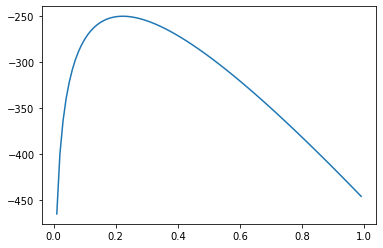

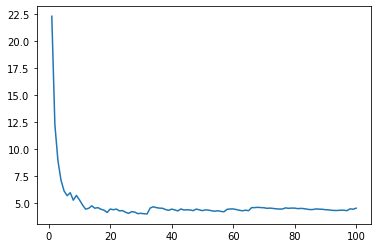

In [53]:
def lnL(lm):
	return dist_analysis['count'] * np.log(lm) - lm * dist_analysis['sum']

def f_lm(k):
	return sum(dist[:k]) / k


p = np.arange(0.01, 1, step=0.01)
py = lnL(p)

k = np.arange(1, 101, 1)
ky = list(map(f_lm, k))

plt.plot( p, py )
plt.show()
plt.plot( k, ky )
plt.show()

In [56]:
t1 = norm.ppf((1 + B) / 2, 0, 1)
print('t1 =', t1)

eps = pow(dist_analysis['variance'] / dist_analysis['count'], 0.5) * t1
print('eps =', eps)

Mxl = dist_analysis['mean'] - eps
Mxr = dist_analysis['mean'] + eps
print('Mxl =', Mxl, 'Mxr =', Mxr)

eps1 = pow(2 / (dist_analysis['count'] - 1), 0.5) * dist_analysis['variance'] * t1
print('eps1 =', eps1)

Dxl = dist_analysis['variance'] - eps1
Dxr = dist_analysis['variance'] + eps1
print('Dxl =', Dxl, 'Dxr =', Dxr)

t1 = 1.959963984540054
eps = 0.9676693547131873
Mxl = 3.526359349007796 Mxr = 5.4616980584341706
eps1 = 6.790523938382391
Dxl = 17.585215169028842 Dxr = 31.16626304579362


In [52]:
t1 = t.ppf((1 + B) / 2, dist_analysis['count'])
print('t1 =', t1)

eps = pow(dist_analysis['variance'] / dist_analysis['count'], 0.5) * t1
print('eps =', eps)

Mxl1 = dist_analysis['mean'] - eps
Mxr1 = dist_analysis['mean'] + eps
print('Mxl1 =', Mxl1, 'Mxr1 =', Mxr1)

t1 = chi2.ppf((1 - B) / 2, dist_analysis['count'] - 1)
print('t1 =', t1)

t2 = chi2.ppf((1 + B) / 2, dist_analysis['count'] - 1)
print('t1 =', t2)

Dxl1 = dist_analysis['variance'] * (dist_analysis['count'] - 1) / t2
Dxr1 = dist_analysis['variance'] * (dist_analysis['count'] - 1) / t1
print('Dxl1 =', Dxl1, 'Dxr1 =', Dxr1)

t1 = 1.9839715184496334
eps = 0.9795223045784825
Mxl1 = 3.5145063991425003 Mxr1 = 5.473551008299466
t1 = 73.36108019128368
t1 = 128.4219886438403
Dxl1 = 18.791160276503472 Dxr1 = 32.894801512484186


# Определение параметров распределения функцией из библиотеки

In [55]:
print(expon.fit(dist))

(0.01989513052131981, 4.474133573199662)
